#Introduction

2020 MLB season has already been hard to predict given it's short nature. This research aims to build a perfect model using team batting stats of the past eight years and then use the model to predict which teams' stats on 08/13/2020 is worthy of getting into postseason on a traditional 10-team postseason format. 


#Methods

Model was built using the combination of 16 team regular season stats:PA, R, H, 2B, 3B, HR, RBI, SB, CS, BB, SO, BA, OBP, SLG, OPS, TB from 2012-2019 and whether that corresponding team went into postseason or not. 

Using SQL Server and Python

Deep learning classification model by experimenting different number of neurons in each layer, different number of layers, different learning rate, model validation, dropout and early stopping.

##Step 1: Import data

import regular season stats from MLB teams who got into postseason during 2012-2019

items include Tm, PA, R, H, 2B, 3B, HR, RBI, SB, CS, BB, SO, BA, OBP, SLG, OPS, TB

total rows are 8(years)*10(teams each year)=80

In [1]:
import pandas as pd
import pyodbc

sql_conn = pyodbc.connect('''DRIVER={ODBC Driver 13 for SQL Server};
                            SERVER=ALLENHO\MSSQLSERVER002;
                            DATABASE=Playoffbound;
                            Trusted_Connection=yes''') 
query = '''
select Tm, PA, R, H, HR, RBI, SB, CS, BB, SO, BA, OBP, SLG, OPS, TB
from [dbo].['19B$']
where Tm in ('WSN','LAD','MIL','ATL','STL','HOU','NYY','MIN','TBR','OAK')
UNION ALL
select Tm, PA, R, H, HR, RBI, SB, CS, BB, SO, BA, OBP, SLG, OPS, TB
from [dbo].['18B$']
where Tm in ('BOS','LAD','MIL','ATL','CHC','HOU','NYY','CLE','COL','OAK')
UNION ALL
select Tm, PA, R, H, HR, RBI, SB, CS, BB, SO, BA, OBP, SLG, OPS, TB
from [dbo].['17B$']
where Tm in ('BOS','LAD','COL','WSN','CHC','HOU','NYY','CLE','ARI','MIN')
UNION ALL
select Tm, PA, R, H, HR, RBI, SB, CS, BB, SO, BA, OBP, SLG, OPS, TB
from [dbo].['16B$']
where Tm in ('TOR','CLE','BOS','BAL','TEX','NYM','CHC','LAD','WSN','SFG')
UNION ALL
select Tm, PA, R, H, HR, RBI, SB, CS, BB, SO, BA, OBP, SLG, OPS, TB
from [dbo].['15B$']
where Tm in ('TOR','KCR','HOU','NYY','TEX','NYM','CHC','LAD','STL','PIT')
UNION ALL
select Tm, PA, R, H, HR, RBI, SB, CS, BB, SO, BA, OBP, SLG, OPS, TB
from [dbo].['14B$']
where Tm in ('BAL','KCR','OAK','LAA','DET','WSN','STL','LAD','PIT','SFG')
UNION ALL
select Tm, PA, R, H, HR, RBI, SB, CS, BB, SO, BA, OBP, SLG, OPS, TB
from [dbo].['13B$']
where Tm in ('BOS','TBR','OAK','CLE','DET','ATL','STL','LAD','PIT','CIN')
UNION ALL
select Tm, PA, R, H, HR, RBI, SB, CS, BB, SO, BA, OBP, SLG, OPS, TB
from [dbo].['12B$']
where Tm in ('TEX','BAL','OAK','NYY','DET','ATL','STL','SFG','WSN','CIN')
'''
df = pd.read_sql(query, sql_conn)

#stored as df_post
df_post = df

import regular season stats from MLB teams who DIDN'T get into postseason during 2012-2019
items are the same as above
total rows are 8(years)*20(teams each year)=160

In [2]:
sql_conn = pyodbc.connect('''DRIVER={ODBC Driver 13 for SQL Server};
                            SERVER=ALLENHO\MSSQLSERVER002;
                            DATABASE=Playoffbound;
                            Trusted_Connection=yes''') 
query = '''
select Tm, PA, R, H, HR, RBI, SB, CS, BB, SO, BA, OBP, SLG, OPS, TB
from [dbo].['19B$']
where Tm is not null and Tm not in ('WSN','LAD','MIL','ATL','STL','HOU','NYY','MIN','TBR','OAK', 'LgAvg')
UNION ALL
select Tm, PA, R, H, HR, RBI, SB, CS, BB, SO, BA, OBP, SLG, OPS, TB
from [dbo].['18B$']
where Tm is not null and Tm not in ('BOS','LAD','MIL','ATL','CHC','HOU','NYY','CLE','COL','OAK', 'LgAvg')
UNION ALL
select Tm, PA, R, H, HR, RBI, SB, CS, BB, SO, BA, OBP, SLG, OPS, TB
from [dbo].['17B$']
where Tm is not null and Tm not in ('BOS','LAD','COL','WSN','CHC','HOU','NYY','CLE','ARI','MIN', 'LgAvg')
UNION ALL
select Tm, PA, R, H, HR, RBI, SB, CS, BB, SO, BA, OBP, SLG, OPS, TB
from [dbo].['16B$']
where Tm is not null and Tm not in ('TOR','CLE','BOS','BAL','TEX','NYM','CHC','LAD','WSN','SFG', 'LgAvg')
UNION ALL
select Tm, PA, R, H, HR, RBI, SB, CS, BB, SO, BA, OBP, SLG, OPS, TB
from [dbo].['15B$']
where Tm is not null and Tm not in ('TOR','KCR','HOU','NYY','TEX','NYM','CHC','LAD','STL','PIT', 'LgAvg')
UNION ALL
select Tm, PA, R, H, HR, RBI, SB, CS, BB, SO, BA, OBP, SLG, OPS, TB
from [dbo].['14B$']
where Tm is not null and Tm not in ('BAL','KCR','OAK','LAA','DET','WSN','STL','LAD','PIT','SFG', 'LgAvg')
UNION ALL
select Tm, PA, R, H, HR, RBI, SB, CS, BB, SO, BA, OBP, SLG, OPS, TB
from [dbo].['13B$']
where Tm is not null and Tm not in ('BOS','TBR','OAK','CLE','DET','ATL','STL','LAD','PIT','CIN', 'LgAvg')
UNION ALL
select Tm, PA, R, H, HR, RBI, SB, CS, BB, SO, BA, OBP, SLG, OPS, TB
from [dbo].['12B$']
where Tm is not null and Tm not in ('TEX','BAL','OAK','NYY','DET','ATL','STL','SFG','WSN','CIN', 'LgAvg')
'''
df = pd.read_sql(query, sql_conn)

#stored as df_npost
df_npost = df

#add each dataframe a new column named POST, which imply whether the team made the postseason that year
df_post['POST']= 1
df_npost['POST']= 0

#append two dataframes together
df_com=df_post.append(df_npost)

#take a look at the table we got
print(df_com)

      Tm      PA      R       H     HR    RBI     SB    CS     BB      SO  \
0    ATL  6302.0  855.0  1432.0  249.0  824.0   89.0  28.0  619.0  1467.0   
1    HOU  6394.0  920.0  1538.0  288.0  891.0   67.0  27.0  645.0  1166.0   
2    LAD  6282.0  886.0  1414.0  279.0  861.0   57.0  10.0  607.0  1356.0   
3    MIL  6309.0  769.0  1366.0  250.0  744.0  101.0  25.0  629.0  1563.0   
4    MIN  6392.0  939.0  1547.0  307.0  906.0   28.0  21.0  525.0  1334.0   
..   ...     ...    ...     ...    ...    ...    ...   ...    ...     ...   
155  PIT  6014.0  651.0  1313.0  170.0  620.0   73.0  52.0  444.0  1354.0   
156  SDP  6112.0  651.0  1339.0  121.0  610.0  155.0  46.0  539.0  1238.0   
157  SEA  6057.0  619.0  1285.0  149.0  584.0  104.0  35.0  466.0  1259.0   
158  TBR  6105.0  697.0  1293.0  175.0  665.0  134.0  44.0  571.0  1323.0   
159  TOR  6094.0  716.0  1346.0  198.0  677.0  123.0  41.0  473.0  1251.0   

        BA    OBP    SLG    OPS      TB  POST  
0    0.258  0.336  0.452  0

##Step 2: Build the deep learning classification model and experiment different number of neurons in each layer

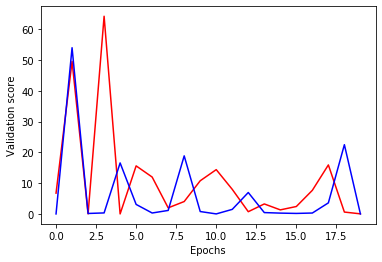

In [17]:
# Import necessary modules

from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import adam
import matplotlib.pyplot as plt

# Save the number of columns in predictors: n_cols
predictors=df_com.loc[:,'PA':'TB'].to_numpy()
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Convert the target to categorical: target
target = to_categorical(df_com['POST'])

# Set up the model_1
model_1 = Sequential()

# Add the first and second layer
model_1.add(Dense(60, activation='relu', input_shape=input_shape))
model_1.add(Dense(60, activation='relu'))

# Add the output layer
model_1.add(Dense(2, activation='softmax'))

# Compile the model
model_1.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(55, activation='relu', input_shape=input_shape))
model_2.add(Dense(55, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=20, batch_size=50, validation_split=0.2, verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=20, batch_size=50, validation_split=0.2, verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

Result: 60 neurons in both hidden layers(red one) had a better performance than 55 neurons in both hidden layers(blue one)

##Step 3: experiment different number of layers

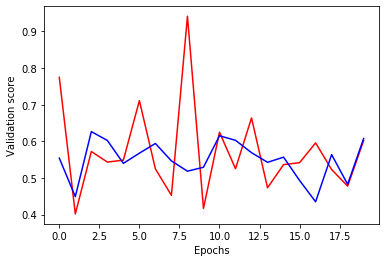

In [4]:
# Create the new model: model_3
model_3 = Sequential()

# Add 20 hidden layers
model_3.add(Dense(60, activation='relu', input_shape=input_shape))
for i in range(19):
    model_3.add(Dense(60, activation='relu'))

# Add the output layer
model_3.add(Dense(2, activation='softmax'))

# Compile model_3
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Create the new model: model_4
model_4 = Sequential()

# Add 25 hidden layers
model_4.add(Dense(60, activation='relu', input_shape=input_shape))
for i in range(24):
    model_4.add(Dense(60, activation='relu'))

# Add the output layer
model_4.add(Dense(2, activation='softmax'))

# Compile model_2
model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model 1
model_3_training = model_3.fit(predictors, target, epochs=20, batch_size=50, validation_split=0.2, verbose=False)

# Fit model 2
model_4_training = model_4.fit(predictors, target, epochs=20, batch_size=50, validation_split=0.2, verbose=False)

# Create the plot
plt.plot(model_3_training.history['val_loss'], 'r', model_4_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

Result: 20 hidden layers(red one) appeared to have better performance than 25 hidden layers(blue one)

##Step 4: Try different learning rate

In [5]:
def get_new_model(input_shape = input_shape):    
    model_5 = Sequential()  
    model_5.add(Dense(60, activation='relu', input_shape = input_shape))    
    for i in range(19):
        model_5.add(Dense(60, activation='relu'))
    model_5.add(Dense(2, activation='softmax'))
    return(model_5)

# Create list of learning rates: lr_to_test
lr_to_test = [.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    # Build new model to test, unaffected by previous models
    model_5 = get_new_model()
    # Create adam optimizer with specified learning rate: my_optimizer
    my_optimizer = adam(lr=lr)
    # Compile the model
    model_5.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    # Fit the model
    model_5.fit(predictors, target, batch_size=50, epochs=10)



Testing model with learning rate: 0.000001

Epoch 1/10
240/240 [==============================] - 1s 5ms/step - loss: 0.6514
Epoch 2/10
240/240 [==============================] - 0s 142us/step - loss: 0.6502
Epoch 3/10
240/240 [==============================] - 0s 146us/step - loss: 0.6490
Epoch 4/10
240/240 [==============================] - 0s 142us/step - loss: 0.6479
Epoch 5/10
240/240 [==============================] - 0s 150us/step - loss: 0.6471
Epoch 6/10
240/240 [==============================] - 0s 137us/step - loss: 0.6463
Epoch 7/10
240/240 [==============================] - 0s 129us/step - loss: 0.6456
Epoch 8/10
240/240 [==============================] - 0s 121us/step - loss: 0.6449
Epoch 9/10
240/240 [==============================] - 0s 133us/step - loss: 0.6443
Epoch 10/10
240/240 [==============================] - 0s 137us/step - loss: 0.6438


Testing model with learning rate: 0.010000

Epoch 1/10
240/240 [==============================] - 1s 6ms/step - loss: 2.482

Result: learning rate as 0.01(default) had the best performance

##Step 5: Try the model with only training data with the best combination of neurons(60), layers(20) and learning rate(0.01, default)

In [6]:
# Set up the model
model_6 = Sequential()

# Add layers
model_6.add(Dense(60, activation='relu', input_shape = input_shape))    
for i in range(19):
    model_6.add(Dense(60, activation='relu'))

# Add the output layer
model_6.add(Dense(2, activation='softmax'))

# Compile the model
model_6.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model
model_6.fit(predictors, target, batch_size=50, epochs=5)

Epoch 1/5
240/240 [==============================] - 2s 6ms/step - loss: 1.0682 - accuracy: 0.5833
Epoch 2/5
240/240 [==============================] - 0s 187us/step - loss: 0.6629 - accuracy: 0.6667
Epoch 3/5
240/240 [==============================] - 0s 175us/step - loss: 0.6520 - accuracy: 0.6667
Epoch 4/5
240/240 [==============================] - 0s 183us/step - loss: 0.6578 - accuracy: 0.6625
Epoch 5/5
240/240 [==============================] - 0s 175us/step - loss: 0.6508 - accuracy: 0.6667


##Step 6: Perform with validating

In [7]:
# Set up the model
model_7 = Sequential()

# Add the first and second layer
model_7.add(Dense(60, activation='relu', input_shape = (n_cols,)))
for i in range(19):
    model_7.add(Dense(60, activation='relu'))

# Add the output layer
model_7.add(Dense(2, activation='softmax'))

# Compile the model
model_7.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model
model_7.fit(predictors, target, validation_split=0.2, batch_size=50, epochs=5)

Train on 192 samples, validate on 48 samples
Epoch 1/5
192/192 [==============================] - 2s 12ms/step - loss: 0.8756 - accuracy: 0.5312 - val_loss: 0.3274 - val_accuracy: 1.0000
Epoch 2/5
192/192 [==============================] - 0s 265us/step - loss: 0.9529 - accuracy: 0.4792 - val_loss: 0.4773 - val_accuracy: 1.0000
Epoch 3/5
192/192 [==============================] - 0s 271us/step - loss: 0.6865 - accuracy: 0.5521 - val_loss: 0.5467 - val_accuracy: 1.0000
Epoch 4/5
192/192 [==============================] - 0s 198us/step - loss: 0.6787 - accuracy: 0.5833 - val_loss: 0.5237 - val_accuracy: 1.0000
Epoch 5/5
192/192 [==============================] - 0s 250us/step - loss: 0.6799 - accuracy: 0.5833 - val_loss: 0.5095 - val_accuracy: 1.0000


##Step 7: Try dropout and see the change of accuracy of both training and validating data set

In [8]:
from keras.layers import Dropout

# Set up the model
model_8 = Sequential()

# Add the layers
model_8.add(Dense(60, activation='relu', input_shape = (n_cols,)))
model_8.add(Dropout(0.5))
for i in range(19):
    model_8.add(Dense(60, activation='relu'))
    model_8.add(Dropout(0.5))

# Add the output layer
model_8.add(Dense(2, activation='softmax'))

# Compile the model
model_8.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model
model_8.fit(predictors, target, validation_split=0.2, batch_size=50, epochs=5)

Train on 192 samples, validate on 48 samples
Epoch 1/5
192/192 [==============================] - 3s 18ms/step - loss: 424.5005 - accuracy: 0.5260 - val_loss: 0.5094 - val_accuracy: 1.0000
Epoch 2/5
192/192 [==============================] - 0s 375us/step - loss: 322.6070 - accuracy: 0.4896 - val_loss: 0.5612 - val_accuracy: 1.0000
Epoch 3/5
192/192 [==============================] - 0s 380us/step - loss: 217.1908 - accuracy: 0.5104 - val_loss: 0.6222 - val_accuracy: 1.0000
Epoch 4/5
192/192 [==============================] - 0s 338us/step - loss: 184.1501 - accuracy: 0.5000 - val_loss: 0.6571 - val_accuracy: 1.0000
Epoch 5/5
192/192 [==============================] - 0s 359us/step - loss: 72.7212 - accuracy: 0.5833 - val_loss: 0.6660 - val_accuracy: 1.0000


As expected, with dropout, training data set became less accurate than without dropout, however validating set became more accurate

##Step 8: Try early stopping and see the change of accuracy of both training and validating data set

In [18]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Specify the model
model_9 = Sequential()
model_9.add(Dense(60, activation='relu', input_shape = input_shape))
for i in range(19):
    model_9.add(Dense(60, activation='relu'))
model_9.add(Dense(2, activation='softmax'))

# Compile the model
model_9.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=5)

# Fit the model
model_9.fit(predictors, target, validation_split=0.2, batch_size=50, epochs=20, callbacks=[early_stopping_monitor])

Train on 192 samples, validate on 48 samples
Epoch 1/20
192/192 [==============================] - 3s 14ms/step - loss: 0.7437 - accuracy: 0.5260 - val_loss: 0.3796 - val_accuracy: 1.0000
Epoch 2/20
192/192 [==============================] - 0s 229us/step - loss: 0.6861 - accuracy: 0.5833 - val_loss: 0.6623 - val_accuracy: 1.0000
Epoch 3/20
192/192 [==============================] - 0s 234us/step - loss: 0.6842 - accuracy: 0.5833 - val_loss: 0.6222 - val_accuracy: 1.0000
Epoch 4/20
192/192 [==============================] - 0s 260us/step - loss: 0.6865 - accuracy: 0.5833 - val_loss: 0.5067 - val_accuracy: 1.0000
Epoch 5/20
192/192 [==============================] - 0s 312us/step - loss: 0.6862 - accuracy: 0.5833 - val_loss: 0.6074 - val_accuracy: 1.0000
Epoch 6/20
192/192 [==============================] - 0s 323us/step - loss: 0.6860 - accuracy: 0.5833 - val_loss: 0.5593 - val_accuracy: 1.0000


Result: 5 epochs to wait before early stop if no progress on the validation set

##Step 9: Perform prediction

import 2020 team stats as of 08/14/2020 normalized to 162 games, try to see which teams' stats on 08/13/2020 is worthy of getting into postseason on a traditional 10-team postseason format. 

In [10]:
import pandas as pd
df_2020=pd.read_excel(r'C:\Users\allen\Desktop\Baseball research\Postseason or bust\2020 projection for 0813.xlsx')
df_2020=df_2020.loc[:,['PA162', 'R162', 'H162', 'HR162', 'RBI162', 'SB162', 'CS162', 'BB162', 'SO162', 'BA', 'OBP', 'SLG', 'OPS', 'TB162']]
print(df_2020.head())

         PA162        R162         H162       HR162      RBI162      SB162  \
0  6096.315789  750.315789  1347.157895  127.894737  707.684211  34.105263   
1  5977.800000  842.400000  1312.200000  226.800000  826.200000  64.800000   
2  6111.000000  864.000000  1467.000000  243.000000  846.000000  63.000000   
3  6096.315789  724.736842  1415.368421  196.105263  682.105263  34.105263   
4  6176.250000  840.375000  1296.000000  232.875000  789.750000  50.625000   

       CS162       BB162        SO162     BA    OBP    SLG    OPS        TB162  
0  25.578947  477.473684  1219.263158  0.245  0.315  0.382  0.697  2097.473684  
1  24.300000  526.500000  1644.300000  0.244  0.316  0.437  0.753  2349.000000  
2  45.000000  513.000000  1305.000000  0.269  0.337  0.473  0.810  2583.000000  
3  25.578947  426.315789  1492.105263  0.254  0.316  0.422  0.738  2353.263158  
4  10.125000  658.125000  1620.000000  0.244  0.344  0.431  0.776  2288.250000  


In [39]:
### Calculate predictions: predictions
predictions = model_9.predict(df_2020.to_numpy())

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# print predicted_prob_true
print(predictions[:,1])
print(predicted_prob_true>0.5)

[0.3952239  0.39462185 0.38999453 0.39484945 0.392843   0.39291558
 0.3971191  0.3997976  0.38670668 0.39637354 0.38669688 0.39432058
 0.3909235  0.38842043 0.39719608 0.39797345 0.39433664 0.3918838
 0.39587435 0.3956131  0.3930428  0.3966231  0.39536327 0.39697862
 0.3974107  0.4047947  0.39315706 0.39955214 0.39503822 0.40168834]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]


#Result

The model we built has a roughly 60% accuracy on training data set(data from 2011-2019). However when trying to see which teams' stats on 08/13/2020(normalized to 162 games) are worthy of getting into postseason on a traditional 10-team postseason format, it shows none of them. 

#Conclusion

Though it's a bit weird to see this, one can probably assume from the result that this is such a bad year for team batting so far that the model doesn't think any team is good enough for postseason on the past eight years' standard. 